<header> <h1> Heat equation </h1></header>

***
***
__Name 1:__

__Name 2:__


***
***

## Instructions
- The projects are organized by groups of two persons of the same tutorial group. Each group has to provide one file at the end of the second session 04/04/2018 at 12:15.
- A particular attention will be given to the CLARITY and the ORGANISATION of the results (order of the argumentation, hypothesis used, explanation of every steps, titles and labels on the graphs...).
- Exceptionnaly, the theoretical questions can be answered to on blank paper, but the number of the question answered to and the objectives of the computations needs to be clearly explained.
- The part 3 and 4 can be answered to independently. Part 5 requires Part 4. And Part 6 and 7 require all the previous ones. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

***
***

## Context

We aim to simulate the diffusion of heat and to optimize the position of a radiator in a room. 

The temperature field $T$ depends on the time $t\in [0,T]$ and of the position $x\in [0, 1]^2 \subset \mathbb{R}^2$ in the room (in 2D). Temperature is commonly modeled by an equation of the form 
\begin{align*} \partial_t T - \lambda \Delta T = S, \end{align*}
where $\partial_t$ is the time derivate (partial derivative), $\Delta = \partial_{xx}^2 + \partial_{yy}^2$ is a space diffusion operator and $S$ models the source of heat in the room (e.g. a radiator or AC). 

***
***
## Construction of the block matrix
We decompose the room $[0,1]^2$ into $N^2$ subdomains $D_{i,j} = [(i-\frac{1}{2})h, (i+\frac{1}{2})h] \times [(j-\frac{1}{2})h, (j+\frac{1}{2})h]$ where $h = \frac{1}{N+1}$ (for $i = 1, \dots, N$ and $j = 1, \dots, N$).

We approximate this equation by a discrete one of the form 
\begin{equation} 
   \forall i=1,\dots, N, \quad \forall j=1,\dots, N, \qquad \frac{T_{i,j}^{n+1} - T_{i,j}^n}{\Delta t} - \lambda \left( \frac{T_{i+1,j}^{n+1}-2T_{i,j}^{n+1}+T_{i-1,j}^{n+1}}{h^2} + \frac{T_{i,j+1}^{n+1}-2T_{i,j}^{n+1}+T_{i,j-1}^{n+1}}{h^2} \right) = S_{i,j}, \label{discrete_eqt} 
\end{equation}
where $T_{i,j}^n$ represent the average temperature in $D_{i,j}$ at time $t^n$.

1) a) Write the Taylor expansion of $T(t,x,y)$ with respect to the $t$ variable around the point $(t^{n+1},x_i,y_j)$ up to order 2.

b) Write the Taylor expansions of $T(t,x,y)$ with respect to the $x$ and $y$ variables around the point $(t^{n+1},x_i,y_j)$ up to order 3.

c) Replace $T_{i,j}^n$ by $T(t^n,x_i,y_j)$ in the discrete equation above, then interprete it. What happens when $h\rightarrow 0$ and $\Delta t \rightarrow 0$?  

2) Note that this discrete equation is a linear equation over matrix $(T_{i,j})_{i=1,\dots,N;j=1,\dots,N}$, while the methods from the course apply for linear equations over vectors. For this purpose, we store $T^n \in \mathbb{R}^{N\times N}$ in vectorial form $\theta^n \in\mathbb{R}^{N^2}$. 

a) Find a function $(i,j) \mapsto k(i,j)$ such that \begin{equation} \theta_{k(i,j)}^n = T_{i,j}^n,\end{equation} where $k(i,j)$ is one index, and such that this corresponds storing $T^n$ row by row into the vector $\theta^n$, i.e. the first components of $\theta^n$ corresponds to the first row of $T^n$, then the following ones correspond to the second row, and so on. Find the inverse $k \mapsto (i,j)$, knowing $N$.

b) Implement the functions $(i,j) \mapsto k$ and $k\mapsto (i,j)$. 

In [13]:
def ij_to_k(i,j,N):
    ...
    return
    
def k_to_ij(k,N):
    ...
    return

3) Consider indices $(i,j)$ such that $1 \neq i \neq N$ and $1 \neq j \neq N$, meaning we only consider domains $D_{i,j}$ that are not in contact with the boundary of $[0,1]^2$. Rewrite the equation over $T^{n+1}$ as an equation over the vector $\theta^{n+1}$ (rewrite all the indices $(i,j)$ into indices $k$ in the given discrete equation).

4) a) Note that the discrete equation involves some terms with indices $0$ and $N+1$. These terms $T_{0,j}^{n+1}$, $T_{N+1,j}^{n+1}$, $T_{i,0}^{n+1}$ and $T_{i,N+1}^{n+1}$ are not part of the unknown $(T_{i,j})_{i=1,\dots,N;j=1,\dots,N}$ and correspond to the temperature on the boundary of the domain. We consider in the following that the temperature on the boundary is constant and known.

These boundary terms appear in the discrete equation when $i=1, \ i=N, \ j=1 \ \text{ or } \ j=N$.

-What are $k(1,j)$ corresponding to $(1,j)$ for $j=1,\dots,N$?

-What are $k(N,j)$ corresponding to $(N,j)$ for $j=1,\dots,N$?

-What are $k(i,1)$ corresponding to $(i,1)$ for $i=1,\dots,N$?

-What are $k(i,N)$ corresponding to $(i,N)$ for $i=1,\dots,N$?

b) Following the previous question, we set the temperature on the boundary as follows
\begin{align*}
    T_{0  ,j  }^{n+1} = B_{j}^{x,0}, \qquad
    T_{N+1,j  }^{n+1} = B_{j}^{x,N}, \qquad
    T_{i  ,0  }^{n+1} = B_{i}^{y,0}, \qquad
    T_{i  ,N+1}^{n+1} = B_{i}^{y,N}.
\end{align*}
Rewrite the equations over $T_{1,j}^{n+1}$, $T_{N,j}^{n+1}$, $T_{i,1}^{n+1}$, $T_{i,N+1}^{n+1}$ in the following form \begin{align*}
    \alpha^1 T_{1,j}^{n+1} + \beta^1 T_{2  ,j  }^{n+1} + \gamma^1 T_{1,j-1}^{n+1} + \omega^1 T_{1,j+1}^{n+1} = R_{j}^1, \\
    \alpha^2 T_{N,j}^{n+1} + \beta^2 T_{N-1,j  }^{n+1} + \gamma^2 T_{N,j-1}^{n+1} + \omega^2 T_{N,j+1}^{n+1} = R_{j}^2, \\
    \alpha^3 T_{i,1}^{n+1} + \beta^3 T_{i  ,2  }^{n+1} + \gamma^3 T_{i-1,1}^{n+1} + \omega^3 T_{i+1,1}^{n+1} = R_{i}^3, \\
    \alpha^4 T_{i,N}^{n+1} + \beta^4 T_{i  ,N-1}^{n+1} + \gamma^4 T_{i-1,N}^{n+1} + \omega^4 T_{i+1,N}^{n+1} = R_{i}^4, 
\end{align*}
and identify the terms $\alpha^l$, $\beta^l$, $\gamma^l$, $\omega^l$ and $R_j^l$ in these equations for $l=1,2,3,4$. 

c) Rewrite these equations in terms of $\theta_k^{n+1}$ with the appropriate $k$ indices that you wrote out in question 4a. 

5) Now, we aim to rewrite the linear equations over the full vector $(\theta_k)_{k=1,\dots, N^2}$ under matrix form $A\theta^{n+1} = b$. 
In the previous two questions, two contributions were written out.

- The equations from question 3 correspond to the $k(i,j)$-th row of $A$ such that the associated $i$ and $j$ are different than $1$ and $N$.  
- The equations from question 4 correspond to the $k(i,j)$-th row of $A$ such that the associated $i$ and $j$ are either $1$ or $N$.  

Assemble these equations to write a linear system $A \theta^{n+1} = b$ over the vector $(\theta_k^{n+1})_{k=1,\dots,N^2}$. Identify the matrix $A\in\mathbb{R}^{N^2\times N^2}$ and the vector $b$ and write them in block form 
\begin{equation}
A = \left(\begin{array}{c|c|c} 
A^{1,1} & \dots & A^{1,N} \\ 
\hline \vdots &&\vdots \\
\hline A^{N,1} & \dots & A^{N,N} 
\end{array}\right), \qquad 
b = \left( \begin{array}{c} 
b^1  \\ \hline \vdots \\ \hline b^N  
\end{array}\right)
\end{equation}
where $A^{i,j}\in\mathbb{R}^{N\times N}$ are submatrices of size $N \times N$ and $b^i \in\mathbb{R}^N$ are vectors of size $N$. Identify them. 

***
***

## Block and band matrices 

Let us consider a matrix of the form 
\begin{align*}
B = \left( 
\begin{array}{c|c|c|c|c|c|c|c} 
    D & \beta I & 0_{\mathbb{R}^{N\times N}} & \dots & \dots & 0_{\mathbb{R}^{N\times N}} \\
    \hline 
    \beta I & D & \beta I & \ddots & &\vdots \\
    \hline 
    0_{\mathbb{R}^{N\times N}} & \beta I & \ddots & \ddots & \ddots & \vdots   \\
    \hline
    \vdots & \ddots & \ddots & \ddots & \ddots &  0_{\mathbb{R}^{N\times N}}  \\
    \hline
    \vdots &  & \ddots & \ddots & \ddots & \beta I\\
    \hline
    0_{\mathbb{R}^{N\times N}} & \dots & \dots & 0_{\mathbb{R}^{N\times N}} & \beta I & D
\end{array}
\right), \qquad D = \left( 
\begin{array}{cccccccc} 
    \alpha & \beta & 0 & \dots & \dots & 0 \\
    \beta & \alpha & \beta & \ddots & &\vdots \\
    0 & \beta & \ddots & \ddots & \ddots & \vdots   \\
    \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
    \vdots &  & \ddots & \ddots & \ddots & \beta \\
    0 & \dots & \dots & 0 & \beta & \alpha
\end{array}
\right)
\end{align*}
where $I\in\mathbb{R}^{N\times N}$ is the identity matrix of size $N\times N$. The matrix $B$ is block tridiagonal and the diagonal blocks $D\in\mathbb{R}^{N\times N}$ are themselves tridiagonal, and composed of values $\alpha\in\mathbb{R}$ and $\beta \in \mathbb{R}$.     

6) a) How many non-zero entries are there in each row of $B$?

b) Then, how many are there in total in the whole matrix?

c) What different values do these non-zero entries take? As these values appear several times in $B$, we will not store the whole matrix $B$ but only the non-zero values of its entries, and exploit the structure of the matrix. 

7) a) Give a condition over $\alpha$ and $\beta$ for Jacobi and Gauss-Seidel algorithms to be applicable to solve the problem $B V = b$.

b) Using results from the lectures, give a (simple) sufficient condition over $\alpha$ and $\beta$ for those methods to converge towards $B^{-1} b$.

8) a) Write the Jacobi algorithm entrywise, i.e. write $V_i^{n+1}$ as a linear function of $(V_j^n)_{j=1,\dots,N^2}$ and $b_i$. 

b) Write it under vectorial form $V^{n+1} = M_J V^n + L_J b$, and identify $M_J$ and $L_J$ under block form.

9) Using the constructions of the Jacobi algorithm from question 8a, write and implement a function that computes the matrix-vector multiplication $M_J V$ with Jacobi iteration matrix $M_J$ and a vector $V$. Your function should take for input 
- $\alpha$,
- $\beta$, 
- and $N$ (not $N^2$ which would be the size of the matrix $B$)
- and the vector $V$
and it should return the vector $U = M_J V$.

The objective here is to construct a matrix multiplication function exploiting the shape of the matrix $B$. So you may not take $B$ nor $M_J$ as inputs, nor construct and store the whole matrices $B\in\mathbb{R}^{N^2\times N^2}$ or $M_J\in\mathbb{R}^{N^2\times N^2}$ full of zeros in your algorithm.  

In [3]:
def Jacobi_mult(alpha, beta, N, V):
    ...

10) a) Test it with \begin{align*} \alpha = 1, \quad \beta=6, \quad N=10 \quad \text{and} \quad V = e_{45} = (0,\dots,0, 1, 0 \dots, 0) \in \mathbb{R}^{N^2}\end{align*} is composed of zeros every where except on the 45-th component. Print the resulting vector $U$.

b) Using the functions of question 2, rewrite the vector $U$ in matrix form $(W_{i,j})_{i=1,\dots,N; j = 1,\dots, N}$ such that $W_{i,j} = U_{k(i,j)}$. Plot this matrix.

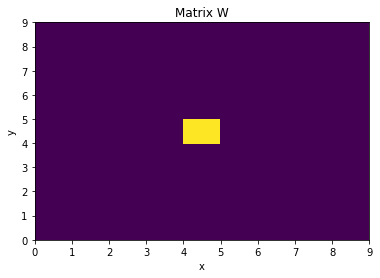

In [4]:
N = 10
W = np.zeros((N,N))
W[4,4] = 1.


fig = plt.figure(1)
plt.pcolormesh(range(N), range(N), W)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Matrix W")
plt.show()

c) Interpret the shape of this representation (symmetry, paterns, position). 

Compute $\sum\limits_{i,j} W_{i,j}$ and explain this value. What would have happen if we had chosen $V= e_1 = (1, 0, \dots, 0)^T$ or $V = e_2 = (0, 1, 0, \dots, 0)^T$? 

11) a) Write the Gauss-Seidel algorithm entrywise, i.e. write $V_i^{n+1}$ as a linear function of $(V_j^n)_{j=1,\dots,N^2}$ and $(V_j^{n+1})_{j \neq i}$ and $b_i$. 

b) Write it under vectorial form $V^{2n+1} = M_G^1 V^{2n} + L_G^1 b$ and $V^{2n+2} = M_G^2 V^{2n+1} + L_G^2 b$, and identify $M_G^1$, $M_G^2$, $L_G^1$ and $L_G^2$ under block form.

12) Using the constructions of the Gauss-Seidel algorithm from question 11a, write and implement two functions that compute the matrix-vector multiplications $M_G^1 V$ and $M_G^2$ with Gauss-Seidel iteration matrices $M_G^1$ and $M_G^2$ and a vector $V$. Your function should take for input 
- $\alpha$
- $\beta$
- $N$
- and the vector $V$
and it should return either the vector $U = M_G^1 V$ or $U = M_G^2 V$.

In [14]:
def GS_mult1(alpha,beta,N,V):
    ...
    return
    
def GS_mult2(alpha,beta,N,V):
    ...
    return 

13) a)  Test them with \begin{align*} \alpha = 1, \quad \beta=6, \quad N=10 \quad \text{and} \quad V = e_{45} = (0,\dots,0, 1, 0 \dots, 0) \in \mathbb{R}^{N^2}\end{align*} is composed of zeros every where except on the 45-th component. Print the resulting vector $U$.

b) Using the functions of question 2, rewrite these vectors $U$ under matrix form $(W_{i,j})_{i=1,\dots,N; j = 1,\dots, N}$ such that $W_{i,j} = U_{k(i,j)}$. Plot these matrices.

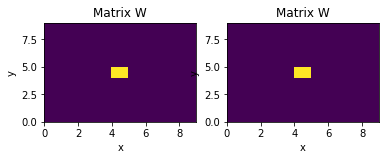

In [6]:
N = 10
W = np.zeros((N,N))
W[4,4] = 1.


plt.figure(2)
plt.subplot(221)
plt.pcolormesh(range(N), range(N), W)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Matrix W")

plt.subplot(222)
plt.pcolormesh(range(N), range(N), W)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Matrix W")

plt.show()

c) Interpret the shape of this representation (symmetry, paterns, position) and compare it with the one obtain with Jacobi iteration matrix. 

Compute $\sum\limits_{i,j} W_{i,j}$ and explain this value. What would have happen if we had chosen $V= e_1 = (1, 0, \dots, 0)^T$ or $V = e_2 = (0, 1, 0, \dots, 0)^T$? 

***
***

## Iterative method

14) a) Implement Jacobi algorithm to solve a problem of the form $BV = b$ using the functions of the previous section. The iterations stop if $\|BV -b\| \le \epsilon_{\max}$ or if the number of iteration reaches $n_{\max}$. Your function should take for input 
- $\alpha$ 
- $\beta$
- $N$
- $V^0$, the initial vector for the iterative method
- $b$, a given vector on the right hand-side
- $n_{\max}$ , the maximum number of iteration of Jacobi method
- $\epsilon_{\max}$, the maximum residual. 

And it should return $B^{-1}b$ at the end. 

In [7]:
def Jacobi_iteration(alpha, beta, N, V0, b, n_max, eps_max):
    ...

b) Test it with the parameters \begin{equation} \alpha=1, \quad \beta=6, \quad N=10,\quad V^0 = 0_{\mathbb{R}^{N^2}}, \quad b=e_{45}, \quad n_{\max} = 10^{5},\quad \epsilon_{\max} = 10^{-8}. \end{equation} 
As in the previous section, print the resulting vector, and plot the matrix $(W_{i,j})_{i=1,\dots,N; j = 1,\dots, N}$ such that $W_{i,j} = V_k$. 

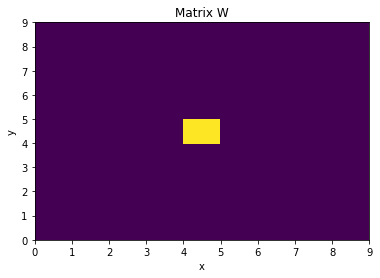

In [8]:
N = 10
W = np.zeros((N,N))
W[4,4] = 1.


fig = plt.figure(3)
plt.pcolormesh(range(N), range(N), W)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Matrix W")

plt.show()

c) -Interprete again compare this shape with the one computed after only one iteration (question 9).

-Compute $\sum\limits_{i,j} W_{i,j}$ and explain why this value is different. What would have happened to this value if we had chosen $V=e_1$ or $V = e_{5}$? Which one would provide the highest $\sum\limits_{i,j} W_{i,j}$ ?

15) a) Implement Gauss-Seidel algorithm to solve a problem of the form $BV = b$ using the functions of the previous section. The iterations stop if $\|BV -b\| \le \epsilon_{\max}$ or if the number of iteration reaches $n_{\max}$. Your function should take for entry 
- $\alpha$ 
- $\beta$
- $N$
- $V^0$, the initial vector for the iterative method
- $b$, a given vector on the right hand-side
- $n_{\max}$ , the maximum number of iteration of Jacobi method
- $\epsilon_{\max}$, the maximum residual. 

And it should return $B^{-1}b$ at the end. 

In [9]:
def GS_iteration(alpha, beta, N, V0, b, n_max, eps_max):
    ...

b) Test it with the parameters \begin{equation} \alpha=1, \quad \beta=6, \quad N=10,\quad V^0 = 0_{\mathbb{R}^{N^2}}, \quad b=e_{45}, \quad n_{\max} = 10^{5},\quad \epsilon_{\max} = 10^{-8}. \end{equation} 
As in the previous section, print the resulting vector, and plot the matrix $(W_{i,j})_{i=1,\dots,N; j = 1,\dots, N}$ such that $W_{i,j} = V_k$. 

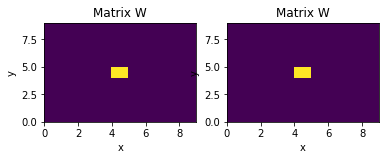

In [10]:
N= 10 
W = np.zeros((N,N))
W[4,4] = 1.


plt.figure(4)
plt.subplot(221)
plt.pcolormesh(range(N), range(N), W)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Matrix W")

plt.subplot(222)
plt.pcolormesh(range(N), range(N), W)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Matrix W")

plt.show()

c) -Interprete again compare this shape with the one computed after only one iteration (question 12) and with the one obtained with Jacobi algorithm. 

-Print $W_{4,5}$, $W_{5,5}$, $W_{6,5}$ and compare them. Interprete.

-Compute $\sum\limits_{i,j} W_{i,j}$.

## Back to the heat equation

16) Now, we fix \begin{align*}
    S_{i,j} &= 10 \times \mathbf{1}_{[\frac{2}{5}, \frac{3}{5}]}(ih) \mathbf{1}_{[\frac{1}{10}, \frac{2}{10}]}(jh)  = \left\{ 
    \begin{array}{ll} 
    10 &\quad\text{if}\quad ih\in\left[\frac{2}{5}, \frac{3}{5}\right] \quad\text{and}\quad jh\in\left[\frac{1}{10}, \frac{2}{10}\right] \\ 
    0 &\quad\text{otherwise},\end{array}\right. \\
    \text{and}\quad  
    B_{j}^{x,0} &= B_{j}^{x,N} = B_{i}^{y,0} = 1, \\
    B_{i}^{y,N} &= 0,
\end{align*}
all independent on $n$. 

Based on these data and on the questions of the first section, reconstruct a right-hand-side vector $b$ at one fixed time iteration $n$, for the problem $A \theta^{n+1} = b$ with a given $\theta^n$. 

17) a) Use Jacobi algorithm to solve this problem at the first time iteration $n=0$, i.e. find $\theta^1$ solution of $A\theta^1 = b$ with \begin{align*} h = 0.02, \quad \lambda = 1, \quad N=50, \quad \theta^0 = (1,\dots,1), \quad \Delta t = 0.01, \quad \epsilon_{\max} = 10^{-8}, \quad n_{\max} =10^5. \end{align*} 
Plot the temperature under matrix form.

b) Compare with the solution obtained with Gauss-Seidel algorithm.

c) Give a physical interpretation of this temperature field, and of the different parameters $S$ and $B$ given in question 15). 

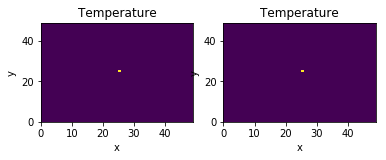

In [11]:
N = 50
T = np.zeros((N,N))
T[25,25] = 1.


fig = plt.figure(5)
plt.subplot(221)
plt.pcolormesh(range(N), range(N), T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Temperature")

plt.subplot(222)
plt.pcolormesh(range(N), range(N), T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Temperature")

plt.show()

18) Now, iterate to find the solution at final time $t^{final} = 100 \Delta t = 1$ and plot the temperature field at final time $t^{final}$. Plot the final solution obtained with the two methods.

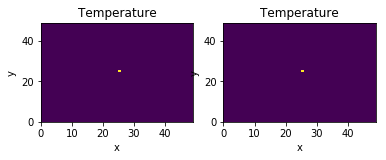

In [12]:
N = 50
T = np.zeros((N,N))
T[25,25] = 1.


fig = plt.figure(6)
plt.subplot(221)
plt.pcolormesh(range(N), range(N), T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Temperature")

plt.subplot(222)
plt.pcolormesh(range(N), range(N), T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Temperature")

plt.show()

19) a) Reproduce the simulation with $\lambda = 10^{-2}$, $\lambda=0.1$, $\lambda =10$, and interprete the influence of this parameter $\lambda$. 

b) Reproduce the simulation with $t^{final} = 10^{-1}$, $t^{final}=2$, $t^{final}=10$, and interprete the influence of this parameter $t^{final}$. 

c) Reproduce the simulation with a source $S$ given by 
\begin{align*}
    S_{i,j} &= 10 \times \mathbf{1}_{[\frac{2}{5}, \frac{3}{5}]}(ih) \mathbf{1}_{[\frac{1}{10}, \frac{2}{10}]}(jh)  = \left\{ 
    \begin{array}{ll} 
    10 &\quad\text{if}\quad ih\in\left[\frac{1}{5}, \frac{2}{5}\right] \quad\text{and}\quad jh\in\left[\frac{8}{10}, \frac{9}{10}\right] \\ 
    0 &\quad\text{otherwise},\end{array}\right. \\
    \text{and}\quad  
    B_{j}^{x,0} &= B_{j}^{x,N} = B_{i}^{y,0} = 1, \\
    B_{i}^{y,N} &= 0,
\end{align*}

 ## Heat optimization
 
 This part is only for **bonus**, and it is an **open question**.

20) a) Compute the averaged temperature in the room at time $t^n$ defined by 
\begin{equation*}
    \bar{T}^n := \frac{\sum\limits_{i,j} T_{i,j}^n h^2}{\sum\limits_{i,j} h^2} = \sum\limits_{i,j} T_{i,j}^n h^2. 
\end{equation*}

b) Move the position of the source $S$. This source should remain rectangular shaped of size $L\times M$ with $L=\frac{1}{5}$ and $M = \frac{1}{10}$, i.e. $S$ remains of the form \begin{equation*} S_{i,j} = 10 \times \mathbf{1}_{Rectangle}(ih,jh),\end{equation*}
where $Rectangle$ is a rectangle of size $L\times M$ (potentially not oriented along $x$ and $y$). 

c) **Open question**: Find the optimal position for the radiator to have a maximum averaged temperature in the room $\bar{T}^n$ at final time $t^{final}=1$. Interprete it physically.